# Exploring the Allen Brain Observatory Database
In this notebook, we'll explore data from the allen Brain Observatory database. See their [documentation](http://help.brain-map.org/display/observatory/Documentation) for more details about the mice, experimental setup, data processing, and analysis.

For an example notebook from the Allen Institute that demonstrates how to work with the data, see [here](http://alleninstitute.github.io/AllenSDK/_static/examples/nb/brain_observatory.html).

### Two recent preprints that have made use of this data:
1. Christensen and Pillow (2017). [Running reduces firing but improves coding in rodent higher-order visual cortex](https://www.biorxiv.org/content/early/2017/11/04/214007)
    * see some of the code [here](https://github.com/achristensen56/PyGLM). To get more of the intermediate files try: ` git checkout f24f10e73c968dd127e41d717771ff62e7cf5ae6 .`
2. Esfahany et al. (2017). [Organization of Neural Population Code in Mouse Visual System](https://www.biorxiv.org/content/early/2017/12/04/220558)

### Also see
* [This helpful blog post](https://kachio.github.io/blog/2016/12/10/Decoding-Identity-of-Natural-Images) on wrangling the Brain Observatory datasets and natural imaging decoding from Onyekachi Odoemene in Anne Churchland's lab. Some of the code for importing is modified from this post, as well as the AllenSDk example.


In [1]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import allensdk.brain_observatory.stimulus_info as stim_info
from allensdk.brain_observatory.natural_scenes import NaturalScenes
import numpy as np
import h5py
import os
# This class uses a 'manifest' to keep track of downloaded data and metadata.  
# All downloaded files will be stored relative to the directory holding the manifest
# file.  If 'manifest_file' is a relative path (as it is below), it will be 
# saved relative to your working directory.  It can also be an absolute path.
boc = BrainObservatoryCache(manifest_file='boc/manifest.json')

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pprint
targeted_structures = boc.get_all_targeted_structures()
print("all targeted structures: " + str(targeted_structures))

cre_lines = boc.get_all_cre_lines()
print("all cre lines: " + str(cre_lines))

all targeted structures: [u'VISal', u'VISam', u'VISl', u'VISp', u'VISpm', u'VISrl']
all cre lines: [u'Cux2-CreERT2', u'Emx1-IRES-Cre', u'Nr5a1-Cre', u'Rbp4-Cre_KL100', u'Rorb-IRES2-Cre', u'Scnn1a-Tg3-Cre']


In [3]:
experiments = boc.get_ophys_experiments(stimuli=['natural_scenes'],
                                        targeted_structures =['VISl', 'VISp'],
                                        session_types=[stim_info.THREE_SESSION_B],
                                       cre_lines=['Cux2-CreERT2'])
len(experiments)

29

In [4]:
import pandas as pd

# The following line takes a while to run the first time
cells = boc.get_cell_specimens()
cells = pd.DataFrame.from_records(cells)
print("total cells: %d" % len(cells))

total cells: 37091


In [5]:
cells.head()

,all_stim,area,cell_specimen_id,donor_full_genotype,dsi_dg,experiment_container_id,failed_experiment_container,g_dsi_dg,g_osi_dg,g_osi_sg,...,specimen_id,tfdi_dg,time_to_peak_ns,time_to_peak_sg,tld1_id,tld1_name,tld2_id,tld2_name,tlr1_id,tlr1_name
0,False,VISpm,517394847,Cux2-CreERT2/Cux2-CreERT2;Camk2a-tTA/wt;Ai93(T...,0.852081,511498500,False,0.468690,0.275754,NaN,...,503292439,0.348821,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
1,False,VISpm,517394850,Cux2-CreERT2/Cux2-CreERT2;Camk2a-tTA/wt;Ai93(T...,NaN,511498500,False,0.730537,0.342070,NaN,...,503292439,0.298012,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
2,False,VISpm,517394854,Cux2-CreERT2/Cux2-CreERT2;Camk2a-tTA/wt;Ai93(T...,0.692137,511498500,False,0.319382,0.215510,NaN,...,503292439,0.380637,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
3,False,VISpm,517394858,Cux2-CreERT2/Cux2-CreERT2;Camk2a-tTA/wt;Ai93(T...,NaN,511498500,False,NaN,NaN,0.76123,...,503292439,NaN,0.4655,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
4,False,VISpm,517394862,Cux2-CreERT2/Cux2-CreERT2;Camk2a-tTA/wt;Ai93(T...,NaN,511498500,False,0.391861,0.742900,NaN,...,503292439,0.330543,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)


For more information about these column names see the brain obsevatory page: http://alleninstitute.github.io/AllenSDK/brain_observatory.html

In [6]:
ec_ids = [ ec['experiment_container_id'] for ec in experiments ]
natural_scences_cells = cells[cells['experiment_container_id'].isin(ec_ids)]
natural_scences_cells.shape

(9677, 60)

In [7]:
natural_scences_cells.columns

Index([u'all_stim', u'area', u'cell_specimen_id', u'donor_full_genotype',
       u'dsi_dg', u'experiment_container_id', u'failed_experiment_container',
       u'g_dsi_dg', u'g_osi_dg', u'g_osi_sg', u'image_sel_ns',
       u'imaging_depth', u'osi_dg', u'osi_sg', u'p_dg', u'p_ns',
       u'p_run_mod_dg', u'p_run_mod_ns', u'p_run_mod_sg', u'p_sg',
       u'peak_dff_dg', u'peak_dff_ns', u'peak_dff_sg', u'pref_dir_dg',
       u'pref_image_ns', u'pref_ori_sg', u'pref_phase_sg', u'pref_sf_sg',
       u'pref_tf_dg', u'reliability_dg', u'reliability_nm1_a',
       u'reliability_nm1_b', u'reliability_nm1_c', u'reliability_nm2',
       u'reliability_nm3', u'reliability_ns', u'reliability_sg',
       u'rf_area_off_lsn', u'rf_area_on_lsn', u'rf_center_off_x_lsn',
       u'rf_center_off_y_lsn', u'rf_center_on_x_lsn', u'rf_center_on_y_lsn',
       u'rf_chi2_lsn', u'rf_distance_lsn', u'rf_overlap_index_lsn',
       u'run_mod_dg', u'run_mod_ns', u'run_mod_sg', u'sfdi_sg', u'specimen_id',
       u'tfdi_

In [ ]:
# this takes a long time to run and downloads a ton of data
for i,exp in enumerate(experiments):
    print(i)
    boc.get_ophys_experiment_data(exp['id']) 

In [30]:
path = 'boc/ophys_experiment_data/'

import re
res = [int(f.strip('.nwb')) for f in os.listdir(path) if re.search('.nwb', f)]

In [69]:
natural_scence_ids = [ ec['id'] for ec in experiments ]
natural_downloaded = set(natural_scence_ids).intersection(res)

For info on how to examine the stimuli presentations, see here: http://alleninstitute.github.io/AllenSDK/_static/examples/nb/brain_observatory_stimuli.html

In [58]:
data_set = boc.get_ophys_experiment_data(500964514)
scenes = data_set.get_stimulus_template('natural_scenes')
print(scenes.shape)
stim_table = data_set.get_stimulus_table('natural_scenes')
stim_table.head()

(118, 918, 1174)


,frame,start,end
0,28,16121,16129
1,81,16129,16136
2,18,16136,16143
3,34,16144,16151
4,-1,16151,16159


In [146]:
sceneIDs = stim_table.frame.unique()
n_scenes = scenes.shape[0]
np.sort(sceneIDs)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117])

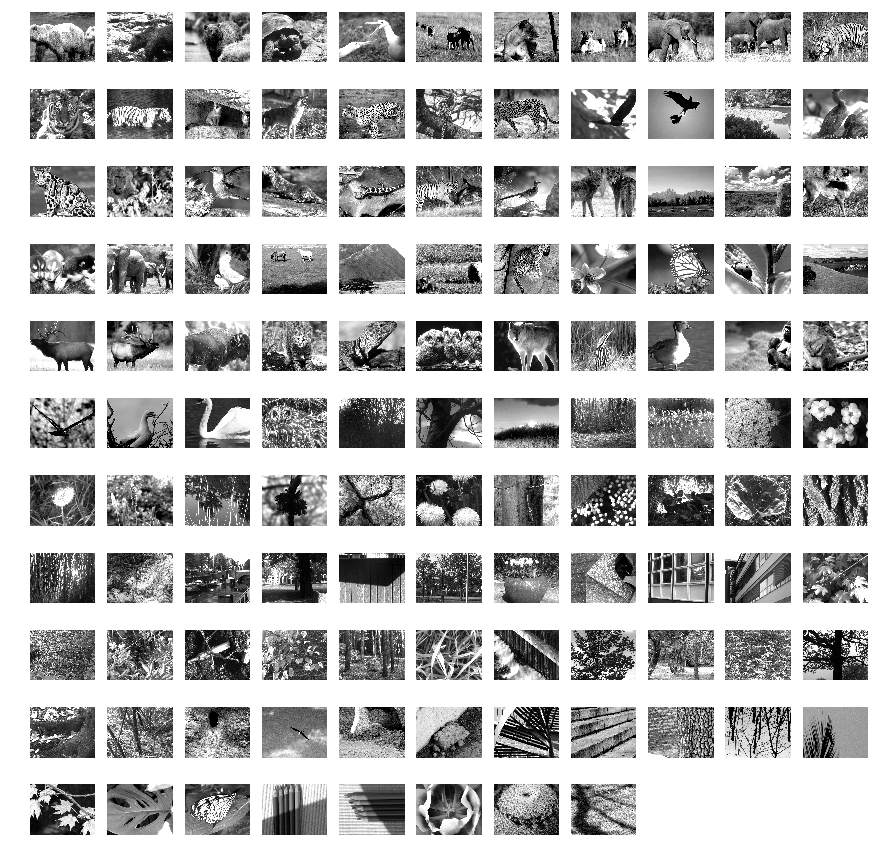

In [55]:
fig, axes = plt.subplots(11,11, figsize=(15,15))
for i, ax in enumerate(fig.axes):
    if i < n_scenes:
        ax.imshow(scenes[i, :,:], cmap='gray')
    ax.set_axis_off()

In [153]:
time,dffTraces = data_set.get_dff_traces()
print(time.shape)
cell_ids = data_set.get_cell_specimen_ids()
numCells = len(cell_ids)
print(numCells)
# presentations of each stimulus
trials_per_scene = len(stim_table)//len(sceneIDs)
print(trials_per_scene)
dffTraces.shape

(114097,)
214
50


(214, 114097)

In [154]:
fr = 1/np.mean(np.diff(time))
print(fr)

30.1419581455


In [162]:
# modified code from https://github.com/kachiO/ipython-notebooks/blob/master/mouse%20natural%20images%20identity/download%20multiple%20datasets.ipynb
interlength = 7 #in frames, 0.25 secs
stim_length = 7 #frames, 0.25 secs
sweep_length = 2 * interlength + stim_length #in frames, 

nTrials = len(stim_table)
y = np.empty((n_scenes, trials_per_scene))
XT_exp = np.empty((n_scenes,numCells,trials_per_scene,sweep_length))
to_add = np.arange(sweep_length)-interlength

for i in range(n_scenes):
    trial_mask = (stim_table.frame == sceneIDs[i])
    this_stim_table = stim_table[trial_mask]
    # broadcast to get index
    idx = this_stim_table.start.values.reshape(-1,1) + to_add
    XT_exp[i,:,:,:] = dffTraces[:, idx]
    y[i,:] = scene